Heuristic Algorithm Implementation

In [129]:
import random

def random_max2sat(clauses, num_variables, num_iterations):
    best_assignments = set()
    best_satisfaction = float('-inf')

    for _ in range(num_iterations):
        assignment = [random.choice([1, 0]) for _ in range(num_variables)]
        satisfaction = calculate_satisfaction(clauses, assignment)

        if satisfaction > best_satisfaction:
            best_assignments = {tuple(assignment)}
            best_satisfaction = satisfaction
        elif satisfaction == best_satisfaction:
            best_assignments.add(tuple(assignment))

    return best_assignments, best_satisfaction

def calculate_satisfaction(clauses, assignment):
    satisfaction = 0
    for clause in clauses:
        is_satisfied = False
        for literal in clause:
            var, is_negated = literal[1:], literal.startswith('!')
            index = int(var[1:]) - 1 if is_negated else int(var) - 1
            if assignment[index] == (not is_negated):
                is_satisfied = True
                break
        if is_satisfied:
            satisfaction += 1
    return satisfaction

def num_vars(variables):
    highest_number = 0
    for var in variables:
        for v in var:
            if v.startswith('x'):
                num = v[1:]
                if num.isnumeric():
                    num = int(num)
                    if num > highest_number:
                        highest_number = num
            elif v.startswith('!'):
                num = v[2:]
                if num.isnumeric():
                    num = int(num)
                    if num > highest_number:
                        highest_number = num
    return highest_number

Used Samples, Which are Generated Randomly

In [130]:
#size 121
clauses6 = [
  [("!x1", "!x2"), ("x3", "x1"), ("x1", "x2"), ("x2", "x1"), ("x2", "!x1"), ("x1", "!x3"), ("!x1", "!x2"), ("!x2", "x1")],
  [("!x2", "!x5"), ("!x2", "!x5"), ("!x2", "!x3"), ("x2", "x3"), ("x4", "x3"), ("!x5", "x4"), ("!x2", "x5"), ("!x3", "!x5"), ("x4", "x2")],
  [("!x3", "!x6"), ("!x4", "!x2"), ("x5", "x1"), ("!x3", "!x4"), ("!x4", "!x5"), ("!x3", "!x5"), ("x4", "x2"), ("x6", "x3"), ("x3", "!x6")],
  [("x4", "x6"), ("!x1", "x7"), ("x7", "!x1"), ("x7", "!x5"), ("x7", "x5"), ("!x2", "x7"), ("!x7", "x3"), ("x7", "!x2"), ("!x6", "x1")],
  [("x3", "!x5"), ("!x5", "!x1"), ("x2", "!x5"), ("x4", "x5"), ("x1", "!x4"), ("!x5", "x2"), ("!x4", "x2")],
  [("x4", "!x2"), ("x2", "x3"), ("!x1", "x3"), ("!x1", "x4"), ("!x3", "!x2"), ("!x4", "x2"), ("x3", "x1"), ("!x3", "x1"), ("x2", "!x3"), ("!x3", "x2")],
  [("!x1", "x2")],
  [("x5", "!x2"), ("x2", "!x1"), ("!x1", "x4"), ("x2", "x3"), ("!x4", "x5"), ("!x1", "!x5"), ("x2", "!x4"), ("!x2", "!x1"), ("!x5", "!x2"), ("x5", "x4")],
  [("!x3", "x6"), ("x7", "!x4"), ("x3", "!x1"), ("!x2", "x1"), ("x4", "!x6"), ("!x1", "!x5"), ("x5", "!x2"), ("!x6", "!x3"), ("!x3", "!x5"), ("!x1", "!x3"), ("x2", "!x1"), ("x5", "x6")],
  [("x2", "x1"), ("x3", "x1"), ("x3", "!x2"), ("x1", "!x3"), ("!x3", "x1")],
  [("!x5", "!x3"), ("x4", "!x8"), ("!x1", "x4"), ("x8", "x2"), ("!x3", "x1"), ("x8", "x5"), ("!x3", "!x7")],
  [("x4", "x1"), ("!x3", "x5"), ("x5", "!x2")],
  [("!x3", "!x1"), ("!x3", "!x1"), ("x2", "x1"), ("!x3", "x2"), ("!x1", "x3"), ("!x3", "!x2"), ("!x1", "!x2"), ("!x3", "x1"), ("!x3", "!x2"), ("x3", "!x1"), ("!x3", "x1")],
  [("!x4", "!x5"), ("x3", "!x5"), ("x5", "x2"), ("x4", "!x5"), ("!x2", "!x5"), ("x5", "x3")],
  [("!x5", "x2"), ("!x6", "!x5"), ("!x7", "x1"), ("x6", "x4"), ("!x8", "x2"), ("x5", "!x3"), ("x8", "!x7"), ("!x4", "!x1"), ("x4", "!x5"), ("x7", "!x2"), ("!x4", "!x1")],
  [("x3", "x1"), ("x1", "!x4"), ("!x3", "!x2"), ("x5", "x3"), ("x3", "!x6"), ("x1", "x2"), ("x2", "x7")],
  [("x1", "x4"), ("x3", "x1"), ("!x1", "!x4"), ("x1", "x2"), ("x3", "!x4"), ("!x3", "x4"), ("!x1", "x4"), ("!x4", "!x1")],
  [("x2", "x3"), ("x8", "x6"), ("!x2", "x9"), ("!x2", "x8"), ("x8", "!x5"), ("!x8", "x2"), ("x8", "!x4"), ("x4", "x2"), ("!x3", "!x7"), ("!x2", "!x8"), ("x2", "x4"), ("!x2", "!x7"), ("x1", "!x6")],
  [("x1", "!x2"), ("x3", "!x2"), ("!x3", "x1"), ("x1", "x2"), ("x3", "!x1"), ("x3", "!x2"), ("!x3", "x1"), ("!x3", "!x2"), ("!x1", "!x3"), ("x1", "!x3"), ("x2", "x1")],
  [("!x4", "x3"), ("!x3", "x1"), ("x3", "x4"), ("!x1", "x3"), ("!x4", "x1"), ("!x1", "x4"), ("!x4", "!x1"), ("!x4", "!x3")],
  [("!x4", "x2"), ("x2", "!x6"), ("!x3", "!x5"), ("x2", "x5"), ("x2", "!x6"), ("!x3", "x5"), ("x6", "!x2")],
  [("x3", "x2"), ("x2", "x3"), ("!x1", "x3"), ("x2", "!x3"), ("!x3", "!x2"), ("!x2", "!x1"), ("!x2", "x3"), ("!x3", "!x2"), ("!x1", "!x2"), ("x2", "x1"), ("!x2", "!x3")],
  [("x1", "x4"), ("!x2", "!x4"), ("!x2", "x1"), ("x4", "x1"), ("x4", "x1"), ("x4", "!x3"), ("!x3", "x4"), ("!x4", "!x3"), ("x2", "!x3"), ("x4", "x3")],
  [("x8", "!x3"), ("x7", "x3"), ("!x5", "!x6"), ("x2", "x5"), ("x1", "x5"), ("x8", "x3"), ("x8", "x4"), ("x8", "!x6")],
  [("x2", "x1"), ("x2", "x1"), ("!x1", "!x2"), ("x2", "!x1")],
  [("x6", "!x8"), ("x6", "!x1"), ("!x5", "!x8"), ("x8", "!x4"), ("!x2", "!x6"), ("x5", "!x7"), ("x3", "x8")],
  [("!x2", "!x1"), ("x1", "!x2"), ("x1", "x2"), ("!x2", "x1"), ("!x2", "!x1"), ("x2", "!x1")],
  [("x2", "x1"), ("!x1", "x2"), ("!x2", "x1")],
  [("x1", "x2"), ("x3", "!x1"), ("!x3", "!x2"), ("x2", "x5"), ("x3", "x5"), ("x3", "x1"), ("x1", "x5"), ("x4", "x1"), ("x5", "!x1"), ("!x1", "x3")],
  [("!x1", "x2"), ("x2", "x3"), ("x2", "x3"), ("x3", "!x2"), ("x1", "x3")],
  [("!x7", "!x1"), ("x4", "!x5"), ("!x2", "!x4"), ("!x4", "!x2"), ("x6", "x4"), ("!x6", "!x2"), ("!x2", "!x3"), ("x5", "!x3"), ("x1", "!x6")],
  [("x3", "x5"), ("x4", "!x5"), ("x2", "!x5"), ("x4", "x5")],
  [("x2", "x1"), ("!x1", "x6"), ("!x1", "!x5"), ("x6", "!x4"), ("x4", "x2"), ("x2", "x5"), ("!x5", "!x3"), ("x3", "!x4"), ("x2", "x3"), ("x6", "!x2"), ("!x4", "x6"), ("!x6", "!x4")],
  [("x1", "x4"), ("!x1", "x2"), ("x1", "x3")],
  [("x1", "!x2"), ("x1", "x2"), ("!x1", "!x2"), ("!x2", "!x1")],
  [("!x1", "x2"), ("x2", "x1"), ("x2", "!x1"), ("x2", "!x1"), ("x2", "x1")],
  [("x6", "!x5"), ("!x2", "!x3"), ("!x7", "x3"), ("x7", "!x6"), ("!x2", "!x4"), ("x4", "!x2"), ("!x7", "x3"), ("!x1", "x2")],
  [("x2", "x4"), ("!x1", "x6"), ("x1", "!x5")],
  [("x6", "!x1"), ("x6", "!x1"), ("!x4", "!x1"), ("!x7", "x3"), ("x3", "!x6"), ("x4", "x5")],
  [("x4", "!x2"), ("x4", "!x5"), ("!x2", "x4"), ("x2", "x3"), ("!x2", "!x5"), ("!x2", "!x6"), ("x2", "!x4")],
  [("x5", "!x4"), ("x2", "x1"), ("!x1", "!x5"), ("!x4", "!x5"), ("x4", "!x5"), ("x3", "x4"), ("x2", "x4"), ("!x1", "x5"), ("x5", "x6"), ("!x6", "x1")],
  [("x7", "!x3"), ("x8", "x7"), ("x6", "x3"), ("x7", "x6"), ("!x8", "!x6"), ("!x5", "!x1"), ("!x8", "x4"), ("!x7", "x1")],
  [("x4", "!x5"), ("x5", "!x1"), ("x2", "!x5"), ("x4", "x1"), ("x5", "x2"), ("x5", "x3"), ("!x3", "x4"), ("x3", "!x2")],
  [("x1", "x5"), ("x1", "x2"), ("!x5", "x4"), ("!x1", "!x5"), ("!x1", "x3"), ("x4", "x5"), ("!x2", "x3"), ("!x2", "x1"), ("x5", "!x2"), ("x1", "!x4")],
  [("x1", "!x2"), ("!x4", "!x3"), ("!x4", "!x2"), ("x3", "!x4"), ("x1", "x4"), ("x4", "!x3"), ("x2", "x1")],
  [("!x6", "!x4"), ("x3", "x6"), ("!x5", "x2"), ("!x3", "!x1"), ("x5", "!x3"), ("x2", "!x1")],
  [("!x4", "x7"), ("!x9", "x5"), ("x7", "x4"), ("!x2", "x8"), ("x2", "x5"), ("!x6", "!x4"), ("x1", "x6"), ("!x4", "x7"), ("!x4", "x7"), ("x8", "x9")],
  [("x5", "x9"), ("!x2", "!x3"), ("x3", "!x8"), ("x2", "x9"), ("!x9", "!x1"), ("x9", "x2"), ("x1", "!x7"), ("x8", "!x2"), ("!x9", "x1"), ("!x1", "!x4"), ("!x1", "x7"), ("x9", "!x6")],
  [("x5", "!x1"), ("!x2", "!x7"), ("x3", "x6"), ("!x4", "x5"), ("x2", "x4"), ("x3", "!x5"), ("x1", "x5"), ("!x5", "!x4"), ("!x7", "!x6"), ("!x4", "!x7"), ("!x4", "!x3")],
  [("x3", "x5"), ("!x2", "!x1"), ("x2", "!x8"), ("!x3", "!x4"), ("!x2", "!x5")],
  [("!x2", "!x6"), ("x7", "!x5"), ("!x2", "!x1"), ("!x1", "x6"), ("!x6", "!x4"), ("!x4", "x1"), ("!x3", "!x5"), ("x5", "!x6"), ("x4", "!x5"), ("x3", "x7"), ("x2", "!x1"), ("!x6", "x3"), ("!x6", "!x7")],
  [("x5", "x4"), ("x1", "x2"), ("!x6", "x2"), ("!x1", "!x4"), ("!x4", "x3"), ("x1", "x4"), ("!x5", "x2"), ("x2", "x3"), ("!x6", "x3")],
  [("!x4", "!x2"), ("!x4", "!x1"), ("!x2", "!x1"), ("x1", "!x3"), ("x4", "x3")],
  [("x2", "!x8"), ("x4", "x3"), ("x9", "!x7"), ("!x8", "x6"), ("x6", "!x8")],
  [("!x5", "x4"), ("x2", "x3"), ("x6", "x4"), ("!x3", "!x6"), ("x5", "!x2"), ("x5", "!x3"), ("!x2", "!x3"), ("x2", "!x3"), ("x4", "x5"), ("x2", "x6")],
  [("x5", "x1"), ("x2", "!x3"), ("x4", "!x5"), ("!x1", "x4"), ("!x5", "x4"), ("!x3", "x1"), ("x5", "!x2"), ("!x3", "!x5"), ("x5", "!x1"), ("!x5", "!x2"), ("x1", "x4"), ("x2", "!x3")],
  [("x3", "!x1"), ("x4", "x3"), ("x2", "!x4")],
  [("!x8", "x2"), ("x5", "x8"), ("x2", "x6"), ("!x3", "x4"), ("x7", "!x6"), ("x1", "x7"), ("x7", "x4"), ("!x6", "x2"), ("x5", "!x7"), ("!x7", "x1"), ("x5", "!x2"), ("x1", "!x3")],
  [("!x2", "x1")],
  [("!x1", "x3"), ("!x1", "!x2"), ("!x2", "x1"), ("!x2", "!x3"), ("!x2", "!x3"), ("x1", "x3"), ("!x1", "x3")],
  [("!x3", "!x4"), ("x1", "x4"), ("!x1", "!x2"), ("x4", "!x2")],
  [("x3", "x1"), ("x2", "!x3"), ("!x4", "x2"), ("!x2", "!x3"), ("!x2", "x4"), ("x1", "!x4"), ("x4", "x3"), ("x4", "!x2"), ("x2", "x4"), ("x3", "!x4")],
  [("x2", "x3"), ("x1", "!x3"), ("!x1", "x4"), ("!x2", "x5"), ("!x1", "x2"), ("x2", "!x4"), ("x1", "!x3")],
  [("!x5", "x2"), ("x6", "!x4"), ("!x3", "x5"), ("x5", "!x1"), ("!x6", "!x2"), ("!x6", "x4"), ("!x2", "!x5"), ("!x2", "!x6"), ("!x4", "!x6")],
  [("x4", "!x2"), ("!x6", "x9"), ("x9", "x7"), ("!x4", "x3"), ("!x2", "x8"), ("x2", "x4")],
  [("x3", "!x1"), ("!x1", "!x2"), ("!x3", "x2"), ("x2", "x3"), ("!x2", "x1")],
  [("x2", "x3"), ("x4", "!x1"), ("!x2", "!x1"), ("x4", "x2"), ("!x2", "x4")],
  [("x3", "x1"), ("!x6", "!x8"), ("x3", "!x6"), ("x9", "x3"), ("x2", "x8"), ("!x2", "x5"), ("!x4", "x1"), ("!x3", "!x2"), ("!x6", "!x4")],
  [("!x5", "x6"), ("!x1", "!x2"), ("!x1", "!x3"), ("!x1", "!x3"), ("!x6", "!x2"), ("x4", "!x2"), ("x2", "x3"), ("!x1", "x4")],
  [("!x3", "!x1"), ("x1", "!x3"), ("!x3", "x1"), ("!x2", "!x3"), ("x1", "!x3"), ("!x2", "!x1")],
  [("x2", "!x4"), ("x4", "x2"), ("!x1", "x3"), ("x1", "x2"), ("!x2", "!x1"), ("!x2", "!x3"), ("!x2", "!x3"), ("!x1", "!x3"), ("!x3", "!x4"), ("x4", "!x3")],
  [("!x1", "!x3"), ("!x2", "x4"), ("!x4", "!x1"), ("x6", "!x2")],
  [("x8", "!x2"), ("x3", "x8"), ("!x8", "x1"), ("x8", "!x5"), ("!x7", "!x1"), ("!x8", "!x3"), ("!x3", "!x6"), ("x2", "!x1"), ("x3", "!x2"), ("!x1", "!x3"), ("x7", "!x4")],
  [("!x1", "x5"), ("!x9", "!x5"), ("!x6", "x4"), ("x6", "x4"), ("!x2", "x5"), ("!x6", "!x1"), ("!x2", "x3"), ("!x5", "x4"), ("x4", "!x5"), ("x2", "!x3"), ("!x3", "x2")],
  [("x1", "!x2"), ("x2", "x1"), ("!x1", "x2"), ("!x1", "x2"), ("!x1", "x2"), ("!x1", "!x2"), ("x1", "!x2"), ("!x1", "!x2"), ("!x2", "!x1")],
  [("!x1", "x2"), ("x5", "x6"), ("x5", "!x3"), ("!x4", "!x5"), ("!x4", "!x1"), ("x6", "!x1"), ("x2", "!x3"), ("!x2", "!x3"), ("x2", "x5"), ("!x3", "x6")],
  [("!x6", "x4"), ("!x1", "!x8"), ("!x2", "x5"), ("!x2", "!x5"), ("!x6", "x7"), ("!x6", "x8"), ("x9", "x6"), ("!x1", "x5"), ("!x8", "!x6"), ("x1", "x4"), ("x2", "!x3"), ("x2", "x1")],
  [("x1", "!x3"), ("x2", "x1"), ("x3", "!x1"), ("!x1", "x3"), ("x1", "!x2"), ("x1", "x2"), ("x1", "x2"), ("!x2", "!x1"), ("x1", "!x2"), ("!x3", "x1"), ("x1", "!x3")],
  [("!x5", "!x7"), ("!x4", "x1"), ("x4", "x6"), ("!x3", "x4"), ("x2", "x5"), ("!x5", "x6"), ("x5", "x2"), ("!x8", "!x6"), ("x3", "x7"), ("!x3", "!x6"), ("x2", "x5"), ("!x4", "!x7")],
  [("!x3", "x2"), ("!x1", "x4"), ("!x4", "x2"), ("x1", "x2")],
  [("!x2", "x3"), ("!x2", "x4"), ("!x3", "!x1"), ("!x2", "x4"), ("x2", "!x1"), ("!x3", "x1"), ("x3", "!x2")],
  [("x5", "x3"), ("x7", "x4"), ("!x6", "x5"), ("x7", "!x2"), ("!x5", "!x6"), ("x7", "x1")],
  [("!x2", "x1"), ("!x1", "x2")],
  [("!x4", "!x5"), ("x2", "x3"), ("!x3", "x4"), ("x4", "!x1"), ("!x6", "x2"), ("!x3", "x2"), ("!x6", "!x1"), ("!x4", "x2")],
  [("!x3", "x2"), ("!x6", "x3"), ("!x5", "!x3"), ("!x6", "x3"), ("x3", "x7"), ("x3", "!x7")],
  [("x1", "x7"), ("x9", "x5"), ("!x2", "x9"), ("x5", "!x3"), ("!x1", "!x7"), ("!x3", "!x5"), ("!x8", "!x9"), ("!x7", "!x1"), ("!x6", "x7"), ("!x8", "!x5"), ("x3", "x1"), ("x7", "!x3")],
  [("!x2", "!x1"), ("x1", "x2"), ("x2", "x1"), ("x2", "!x1"), ("x2", "x1"), ("!x1", "!x2"), ("!x1", "x2")],
  [("!x3", "!x6"), ("!x5", "!x6"), ("x7", "!x1"), ("x2", "!x6"), ("x5", "x2"), ("!x5", "x2"), ("!x3", "!x6"), ("!x1", "!x5")],
  [("x1", "x5"), ("x5", "!x1"), ("x6", "!x5"), ("x1", "!x2"), ("!x3", "x4"), ("x2", "!x1"), ("x1", "x7"), ("x7", "x6"), ("!x3", "!x4"), ("!x7", "!x1"), ("x4", "x6")],
  [("x6", "!x9"), ("x2", "x5"), ("!x5", "x8"), ("x8", "!x1"), ("x4", "!x8"), ("x4", "!x7"), ("!x4", "x3"), ("!x3", "x8"), ("!x9", "!x4"), ("x8", "!x3"), ("x2", "!x1"), ("x5", "!x1"), ("x8", "!x1")],
  [("!x4", "!x7"), ("!x3", "x4"), ("!x5", "x7"), ("!x1", "x4"), ("!x2", "x6"), ("x2", "!x7"), ("x2", "!x6"), ("!x2", "x3"), ("!x7", "x4"), ("x6", "!x3"), ("x2", "!x4"), ("!x2", "!x4")],
  [("x2", "!x4"), ("x6", "x4"), ("x1", "!x5"), ("x2", "!x3"), ("!x3", "x6"), ("!x5", "x4"), ("x5", "!x4"), ("x5", "x4")],
  [("!x3", "!x1"), ("x3", "x4"), ("x1", "x3"), ("x4", "x3"), ("!x4", "x1"), ("!x1", "x3"), ("!x2", "x3"), ("!x3", "!x1"), ("!x4", "x3"), ("!x4", "!x1"), ("x3", "!x2")],
  [("x2", "x3"), ("x2", "x3"), ("x1", "x2"), ("x3", "x2"), ("!x2", "!x1"), ("x1", "!x2"), ("!x3", "x2")],
  [("!x8", "!x5"), ("!x7", "x1"), ("!x7", "x6"), ("!x7", "x6"), ("!x7", "x4"), ("!x6", "!x4"), ("x1", "x4"), ("x8", "x4"), ("x9", "x8"), ("!x9", "!x1"), ("!x8", "!x3"), ("x6", "!x5"), ("x2", "x8"), ("!x1", "x6")],
  [("!x1", "!x5"), ("!x5", "!x4"), ("x6", "x2"), ("!x6", "x1"), ("!x3", "x4"), ("x4", "x6"), ("!x6", "x2"), ("!x4", "x3")],
  [("x1", "x3"), ("x3", "!x4"), ("!x2", "!x4")],
  [("x1", "x3"), ("!x2", "x3"), ("!x3", "x1"), ("x1", "x3"), ("x1", "!x3"), ("!x3", "!x2")],
  [("!x5", "!x1"), ("!x6", "x2"), ("!x4", "!x5"), ("!x2", "x3"), ("!x6", "x5"), ("x5", "x4")],
  [("!x5", "x1"), ("!x2", "x5"), ("!x1", "x5"), ("x6", "x1"), ("!x6", "!x4"), ("!x6", "x2"), ("!x2", "x6"), ("!x1", "x3")],
  [("!x2", "!x1"), ("!x2", "x1"), ("!x1", "!x2"), ("x2", "x1")],
  [("x2", "!x1"), ("x1", "x3"), ("x2", "x4"), ("x1", "x2"), ("!x3", "!x4"), ("x2", "x4"), ("x2", "x1"), ("x4", "x3"), ("!x2", "!x4")],
  [("x1", "!x4"), ("!x1", "!x4"), ("!x1", "x2"), ("!x4", "!x1"), ("x4", "x1")],
  [("x2", "!x5"), ("!x2", "x1"), ("!x1", "!x3"), ("!x3", "!x4"), ("x3", "x7"), ("x6", "x7"), ("!x5", "x1"), ("x1", "!x7")],
  [("!x3", "x1"), ("!x3", "!x1"), ("x2", "x1"), ("x3", "!x2"), ("x2", "x1"), ("x1", "!x2"), ("x3", "x1"), ("x3", "x1"), ("!x1", "!x2")],
  [("x6", "!x5"), ("x7", "!x2"), ("!x2", "x7"), ("!x3", "x4"), ("!x7", "x4"), ("!x5", "!x7"), ("x3", "x6"), ("x7", "!x4"), ("x4", "!x3"), ("x5", "!x6"), ("x2", "!x7"), ("x6", "!x4")],
  [("!x1", "x3"), ("!x3", "x2"), ("x2", "!x1"), ("!x2", "!x3"), ("x3", "x2"), ("!x1", "x3"), ("!x2", "!x1"), ("x1", "!x2"), ("x1", "x3"), ("x1", "x2"), ("x1", "x3")],
  [("x5", "!x2"), ("x5", "!x4"), ("!x4", "!x2"), ("!x3", "x5"), ("x4", "x3"), ("!x4", "!x5"), ("x5", "!x4"), ("!x4", "x1"), ("!x3", "x2"), ("x1", "x4"), ("x4", "x1"), ("!x3", "x4")],
  [("x1", "!x3"), ("!x3", "x2"), ("x1", "x3"), ("x2", "!x1"), ("x1", "!x3"), ("x2", "!x1")],
  [("!x1", "!x3"), ("!x3", "x1"), ("x1", "!x2"), ("x2", "x1"), ("!x2", "x1"), ("!x1", "!x3"), ("!x3", "!x2"), ("x2", "x1"), ("x2", "!x1")],
  [("x2", "!x4"), ("x7", "x1"), ("x9", "x3"), ("!x4", "!x8"), ("x2", "x6"), ("!x6", "!x9"), ("x8", "!x1"), ("!x4", "!x6"), ("!x2", "!x3"), ("!x6", "!x8")],
  [("x1", "!x2"), ("x2", "!x3"), ("!x1", "x3")],
  [("x3", "x4"), ("x2", "x7"), ("x6", "!x5"), ("!x3", "!x4"), ("x6", "x3"), ("x1", "x5"), ("x6", "x3"), ("x5", "!x3")],
  [("!x1", "x2"), ("x1", "!x2"), ("x2", "!x1"), ("x2", "!x1"), ("x2", "x1"), ("x2", "!x1")],
  [("!x5", "x2"), ("x1", "x3"), ("x5", "!x2"), ("!x1", "x3"), ("x1", "x4"), ("!x3", "x4"), ("x4", "x3"), ("!x3", "!x2"), ("x1", "x4"), ("!x2", "x4"), ("x4", "x2"), ("!x1", "!x4")],
  [("x5", "x1"), ("!x1", "!x2"), ("x4", "!x1"), ("!x1", "x3"), ("!x4", "x5"), ("!x3", "!x4"), ("!x2", "!x1")],
  [("x3", "!x2"), ("!x3", "!x5"), ("!x1", "!x3"), ("x5", "!x1"), ("!x6", "!x2"), ("x5", "x3"), ("!x3", "x4"), ("x3", "x1"), ("!x4", "x1")],
  [("!x6", "x1"), ("!x3", "x2"), ("!x6", "!x3"), ("!x4", "x3"), ("!x1", "!x7"), ("!x5", "!x4"), ("x4", "x1"), ("x5", "x3"), ("x6", "!x7"), ("x4", "!x5"), ("x1", "!x7"), ("x4", "!x6")],
  [("!x3", "!x4"), ("!x1", "!x2"), ("!x1", "x2"), ("!x2", "x3"), ("x3", "x1"), ("x4", "x2"), ("!x4", "x1"), ("!x3", "x1"), ("!x2", "!x4"), ("!x3", "!x1"), ("!x2", "x3")],
  [("x5", "x4"), ("x1", "x5"), ("!x2", "!x3"), ("x2", "x1"), ("x4", "x3"), ("!x1", "x4"), ("!x1", "!x4"), ("x1", "x3"), ("!x4", "x1"), ("x4", "!x1")],
  [("!x4", "!x1"), ("x1", "x4"), ("!x4", "!x6"), ("x2", "x3"), ("!x2", "!x3"), ("!x6", "x7")]
]

In [131]:
#size 81
clauses5 = [
  [("!x1", "!x2"), ("x3", "x1"), ("!x1", "!x3"), ("!x3", "x4"), ("x1", "x4"), ("x2", "x3"), ("!x3", "!x1"), ("x3", "x4"), ("!x4", "!x3")],
  [("!x7", "!x4"), ("x4", "!x1"), ("!x7", "x5"), ("x1", "!x6")],
  [("!x5", "!x4"), ("!x7", "!x6"), ("x8", "!x9"), ("x4", "x9"), ("x7", "x9")],
  [("x4", "!x3"), ("x1", "!x4"), ("!x1", "!x3"), ("x4", "!x2"), ("!x4", "!x2"), ("x4", "!x2"), ("!x4", "x1"), ("x1", "x2"), ("!x4", "!x1"), ("x4", "x1")],
  [("!x3", "x4"), ("!x1", "x5"), ("x2", "x1"), ("!x5", "!x1"), ("x5", "x1"), ("x5", "!x3")],
  [("!x4", "!x5"), ("x1", "x3"), ("!x1", "!x5"), ("x3", "x6"), ("!x2", "!x1"), ("x6", "x1"), ("x6", "x1")],
  [("x2", "x5"), ("!x5", "!x4"), ("!x6", "x5"), ("x2", "x6"), ("!x6", "!x3"), ("!x3", "x2"), ("x5", "x1")],
  [("x1", "x2"), ("!x5", "x1"), ("x2", "x4"), ("x3", "!x4"), ("!x3", "!x2"), ("!x2", "x1"), ("!x5", "!x1"), ("x3", "x2"), ("x3", "!x2"), ("x1", "!x4")],
  [("!x2", "!x3"), ("x2", "x3"), ("x3", "!x2"), ("x3", "!x1"), ("x1", "!x3"), ("!x2", "x1"), ("x2", "!x1")],
  [("x5", "!x7"), ("!x5", "!x1"), ("x6", "!x2"), ("!x2", "x9"), ("x3", "!x4"), ("x9", "!x4"), ("!x9", "x7"), ("x7", "x2"), ("!x1", "!x4"), ("!x5", "x9"), ("x2", "x8"), ("x2", "x3")],
  [("!x3", "!x2"), ("!x3", "!x4"), ("x2", "x4"), ("!x4", "!x8"), ("!x7", "!x8"), ("x3", "!x7"), ("!x5", "!x1")],
  [("x1", "!x2"), ("x3", "!x2"), ("x3", "x2"), ("!x6", "!x7"), ("!x7", "x6"), ("!x2", "!x7"), ("!x3", "x6"), ("!x7", "x4"), ("x5", "x7"), ("x1", "!x5"), ("x5", "!x1"), ("x5", "x4"), ("!x5", "x7")],
  [("!x3", "!x4"), ("!x4", "x3"), ("!x4", "x2"), ("!x1", "!x4"), ("!x4", "!x1"), ("x3", "!x2"), ("!x3", "!x2"), ("!x2", "!x4"), ("x3", "x2"), ("!x1", "!x4"), ("!x1", "x3")],
  [("x3", "x1"), ("!x3", "x5"), ("!x6", "x8"), ("!x2", "x8"), ("x4", "!x7"), ("x1", "!x5"), ("!x3", "x1"), ("!x9", "!x3"), ("x1", "!x2"), ("x2", "!x5"), ("!x1", "x5"), ("x9", "x1")],
  [("!x3", "!x2"), ("x1", "!x2"), ("!x1", "x3"), ("!x3", "x2"), ("!x1", "x2"), ("!x2", "!x1")],
  [("x1", "x4"), ("x1", "x4"), ("!x3", "!x4"), ("!x7", "!x4"), ("!x7", "x6"), ("!x5", "x7")],
  [("x6", "x5"), ("!x5", "!x1"), ("!x6", "x7"), ("x2", "!x6"), ("!x5", "x7"), ("!x2", "x6"), ("x7", "x6"), ("!x1", "x2")],
  [("!x8", "x4"), ("!x6", "x3"), ("x6", "x4"), ("x9", "x8"), ("!x8", "!x3"), ("!x9", "x6"), ("x9", "x5"), ("x9", "x5")],
  [("x3", "x1"), ("x3", "!x4")],
  [("x6", "x2"), ("!x1", "!x4"), ("!x7", "x5"), ("x6", "x4"), ("x2", "x5"), ("!x6", "!x5"), ("!x6", "!x1"), ("x4", "!x5")],
  [("!x6", "!x4"), ("x1", "!x3"), ("!x5", "!x4"), ("!x5", "!x3"), ("x5", "x4"), ("!x5", "x1"), ("x4", "!x3"), ("!x5", "x1"), ("!x2", "!x5"), ("x5", "!x6"), ("!x4", "x2")],
  [("x3", "!x1"), ("x1", "!x3"), ("x2", "!x1"), ("!x2", "x3"), ("!x3", "!x2")],
  [("x1", "!x8"), ("x8", "!x2"), ("x1", "x2"), ("!x5", "!x6"), ("x3", "!x1"), ("!x1", "x5"), ("x7", "!x2"), ("!x5", "x1"), ("x8", "!x6"), ("x6", "!x4")],
  [("x2", "x1"), ("x2", "x1"), ("!x1", "x2"), ("!x2", "x1"), ("x1", "!x2"), ("!x1", "x2")],
  [("!x2", "!x1"), ("!x3", "x2"), ("x2", "!x1"), ("!x1", "x2")],
  [("!x1", "x2"), ("x2", "x1"), ("!x2", "x1"), ("!x2", "!x1"), ("x2", "x1"), ("x2", "x1")],
  [("x2", "!x1"), ("x2", "!x1"), ("x2", "x3"), ("!x2", "!x1"), ("!x2", "!x1"), ("!x1", "!x2")],
  [("x3", "x4"), ("!x3", "!x1"), ("x5", "x2"), ("!x5", "x1"), ("x4", "!x2"), ("x4", "x2"), ("x4", "x1"), ("x1", "!x4"), ("x5", "!x1"), ("!x2", "!x3")],
  [("!x6", "x1"), ("x2", "x3"), ("!x2", "x6"), ("!x3", "x5"), ("!x1", "x2"), ("!x3", "!x1"), ("!x1", "!x2"), ("x7", "x5"), ("!x2", "!x1"), ("x6", "!x3"), ("x6", "!x4")],
  [("x7", "!x8"), ("x2", "x3"), ("!x4", "x8"), ("!x2", "!x4"), ("!x2", "x7"), ("!x7", "!x8"), ("x4", "!x5"), ("x7", "!x4"), ("x8", "!x1"), ("!x4", "x2")],
  [("x3", "!x2"), ("!x2", "x1"), ("!x3", "x2"), ("x2", "x3"), ("!x3", "x2")],
  [("!x3", "!x1"), ("x2", "x3"), ("!x2", "x1"), ("!x1", "!x3"), ("!x4", "!x2"), ("!x3", "!x2"), ("x3", "!x1"), ("x4", "x3")],
  [("!x1", "!x4"), ("x2", "!x4"), ("x4", "!x2"), ("!x4", "x2")],
  [("x2", "x3"), ("!x4", "x2"), ("!x2", "x4"), ("x1", "!x2")],
  [("x2", "!x3"), ("!x2", "!x3"), ("!x1", "x2"), ("!x4", "x1"), ("!x5", "x4"), ("!x6", "!x7"), ("x7", "!x3"), ("!x4", "x7"), ("!x7", "!x5")],
  [("x6", "!x3"), ("!x7", "x4"), ("!x6", "x3"), ("x4", "!x1"), ("!x2", "x1"), ("!x5", "!x1"), ("x1", "x2"), ("!x7", "!x4"), ("!x2", "x6"), ("!x3", "x6")],
  [("x1", "!x2"), ("!x1", "x2"), ("!x1", "x2"), ("!x2", "x1")],
  [("!x3", "!x1"), ("x3", "!x4"), ("!x2", "x1"), ("!x3", "!x4"), ("!x3", "!x4"), ("x1", "!x2"), ("x3", "!x4"), ("!x2", "x1"), ("x4", "x2")],
  [("!x2", "!x1"), ("x1", "!x2"), ("x2", "!x1"), ("x1", "x2"), ("x2", "!x1"), ("!x1", "!x2"), ("x1", "x2"), ("!x2", "x1"), ("x1", "x2"), ("x1", "x2")],
  [("!x3", "x2"), ("x1", "!x3"), ("!x1", "x4"), ("!x4", "x2"), ("x1", "x4"), ("!x4", "!x3")],
  [("x3", "x2"), ("!x7", "x3"), ("!x3", "x8"), ("!x4", "!x6"), ("x4", "!x8"), ("x9", "!x2"), ("x1", "!x4"), ("x4", "x2"), ("!x2", "x8"), ("!x5", "!x8"), ("!x5", "!x3"), ("x4", "!x8")],
  [("x3", "!x1"), ("x1", "x2"), ("!x3", "!x2"), ("!x1", "x3"), ("x3", "!x1"), ("x2", "!x3"), ("x3", "!x1"), ("!x3", "x2"), ("x3", "!x1"), ("x2", "x1"), ("x3", "!x1")],
  [("!x7", "!x2"), ("!x1", "x6"), ("x4", "!x6"), ("x5", "x1")],
  [("!x1", "x3"), ("!x3", "!x2"), ("x1", "!x2"), ("!x2", "!x1"), ("!x1", "!x2")],
  [("!x4", "!x5"), ("x4", "!x3"), ("!x3", "x6"), ("!x5", "!x1"), ("!x4", "x5"), ("x5", "!x2"), ("!x6", "x4"), ("x1", "!x5"), ("!x2", "x3")],
  [("x3", "x2"), ("!x2", "!x1"), ("!x3", "!x1"), ("!x1", "x2"), ("!x3", "!x1"), ("x1", "!x2"), ("!x2", "x1"), ("!x1", "x3"), ("!x2", "x3"), ("!x1", "x2")],
  [("!x1", "!x2"), ("x2", "x1"), ("!x2", "x1"), ("x2", "x1"), ("!x2", "!x1")],
  [("x1", "!x6"), ("x8", "x2"), ("!x1", "x8"), ("!x3", "!x6")],
  [("x3", "!x4"), ("x4", "!x3"), ("!x1", "!x4"), ("x4", "x2"), ("x2", "!x3")],
  [("x7", "!x8"), ("!x7", "!x2"), ("!x2", "!x8"), ("!x2", "!x4")],
  [("x5", "!x6"), ("!x3", "x6"), ("x2", "x7"), ("!x4", "x6"), ("x3", "x2"), ("!x2", "x5"), ("!x3", "x5"), ("!x3", "!x1")],
  [("!x4", "x1"), ("!x1", "x4"), ("x2", "!x1"), ("!x3", "!x2")],
  [("x3", "!x4"), ("x4", "x1"), ("!x2", "x1"), ("x3", "!x1"), ("x1", "x3"), ("!x2", "x4")],
  [("!x2", "!x3"), ("!x1", "!x4"), ("x1", "x4"), ("!x3", "x4"), ("!x1", "!x3"), ("!x1", "!x4"), ("!x4", "x2"), ("!x3", "!x1"), ("x4", "!x2")],
  [("x3", "!x1"), ("x3", "x1"), ("!x4", "x2"), ("!x1", "x4"), ("!x1", "!x4"), ("x3", "!x5"), ("!x1", "!x2"), ("x2", "x6")],
  [("x5", "x3"), ("!x5", "!x3"), ("!x6", "x5"), ("x4", "x6"), ("x1", "x4"), ("!x4", "x3"), ("x2", "x4"), ("!x2", "!x4"), ("x1", "x6"), ("x3", "!x1"), ("x6", "!x4")],
  [("!x4", "!x9"), ("x5", "!x2"), ("!x1", "x8"), ("x3", "!x4"), ("!x5", "x3"), ("!x7", "!x8"), ("x8", "x5"), ("!x5", "x9"), ("!x1", "!x5"), ("!x4", "!x9")],
  [("x3", "!x2"), ("!x4", "x5"), ("!x4", "!x5"), ("x4", "!x1"), ("!x6", "x4"), ("x4", "x1")],
  [("!x1", "!x6"), ("!x7", "x3"), ("x7", "!x3"), ("!x1", "!x2"), ("!x5", "!x3")],
  [("x4", "x1"), ("x4", "!x6"), ("x5", "x1"), ("x6", "x3"), ("x4", "x3")],
  [("x3", "!x1"), ("!x4", "x2"), ("!x4", "!x2")],
  [("!x2", "!x4"), ("!x4", "x2"), ("x5", "x6"), ("x6", "x1"), ("!x2", "x4"), ("x3", "x5"), ("!x4", "!x5"), ("!x2", "!x5")],
  [("x5", "x4"), ("!x3", "!x1"), ("x5", "!x2"), ("x3", "x5"), ("!x2", "!x4")],
  [("x1", "!x2"), ("x1", "x2"), ("!x1", "!x2"), ("x2", "!x1"), ("!x2", "x1")],
  [("x1", "x2"), ("x5", "x7"), ("x1", "!x2"), ("!x3", "x2"), ("x2", "!x5"), ("x8", "x4"), ("!x7", "!x3"), ("!x3", "x8"), ("x6", "x4")],
  [("x1", "!x2"), ("!x4", "x1"), ("!x1", "x5"), ("!x8", "x2"), ("x1", "!x2"), ("x4", "!x5"), ("!x1", "!x6"), ("!x6", "!x4")],
  [("x1", "x4"), ("!x1", "x4"), ("x3", "!x1"), ("x1", "x2"), ("x4", "x3"), ("!x3", "x1"), ("x4", "x1"), ("!x2", "x4"), ("x1", "x3"), ("!x4", "!x1")],
  [("!x9", "x6"), ("x5", "!x4"), ("!x6", "!x5"), ("x9", "!x3"), ("!x6", "x2")],
  [("!x4", "x6"), ("!x2", "!x4"), ("!x3", "!x2"), ("!x5", "x4"), ("!x1", "!x5"), ("!x5", "!x6")],
  [("x1", "!x2"), ("!x2", "x3"), ("x1", "!x3"), ("!x3", "x1")],
  [("!x5", "!x3"), ("x4", "!x3"), ("x6", "x3"), ("!x5", "!x1"), ("!x3", "x1"), ("x3", "!x7"), ("x7", "!x6"), ("!x2", "x7"), ("x3", "x8"), ("!x8", "x3")],
  [("x3", "!x1"), ("!x1", "x2"), ("x3", "!x1"), ("!x3", "!x2"), ("x2", "x3"), ("!x1", "x2"), ("!x3", "!x2"), ("!x2", "!x3")],
  [("!x2", "!x4"), ("!x2", "x6"), ("x9", "!x8"), ("!x7", "x6"), ("!x9", "x1"), ("!x3", "!x2"), ("!x9", "x6"), ("!x1", "!x7")],
  [("!x2", "x1"), ("!x4", "!x2"), ("x2", "!x4")],
  [("x1", "!x4"), ("x1", "x7"), ("x1", "x5"), ("!x2", "x3"), ("!x3", "!x5"), ("!x1", "!x3"), ("x6", "x7"), ("!x4", "!x5"), ("!x5", "!x7"), ("!x7", "!x6"), ("x2", "x3"), ("!x2", "x4")],
  [("x2", "!x1"), ("x1", "x3"), ("!x2", "x1"), ("x1", "!x3"), ("x2", "x1"), ("x1", "!x3"), ("x2", "x1")],
  [("!x5", "x2"), ("!x5", "x4"), ("x1", "!x4"), ("!x1", "!x6"), ("!x3", "!x1"), ("x2", "x4"), ("!x4", "!x6"), ("!x2", "x1"), ("!x6", "!x3"), ("!x5", "!x2"), ("!x6", "!x5")],
  [("x5", "x4"), ("!x6", "!x5"), ("x1", "x3"), ("x6", "!x7"), ("x5", "x4"), ("x5", "!x6"), ("x2", "!x4"), ("!x2", "!x4"), ("!x1", "!x5"), ("x1", "x2")],
  [("!x6", "x2"), ("!x1", "x5"), ("!x5", "!x4"), ("x2", "x5"), ("x5", "!x1"), ("x6", "!x8"), ("x4", "x3"), ("!x4", "!x7"), ("!x4", "!x7"), ("x3", "!x7"), ("!x7", "!x4"), ("!x8", "!x5"), ("x1", "x4")],
  [("!x1", "x3"), ("x3", "x8"), ("x8", "!x3"), ("x5", "x2"), ("!x6", "!x4")],
  [("!x5", "!x4"), ("!x2", "!x1"), ("!x5", "x3"), ("!x4", "x3"), ("x5", "!x4"), ("x5", "x3"), ("x1", "!x2"), ("x5", "!x4"), ("x1", "!x2")]
]

In [132]:
#size 61
clauses4 = [
  [("!x6", "x1"), ("!x3", "!x5"), ("x1", "x2"), ("x3", "!x5"), ("!x3", "!x2"), ("!x2", "!x1"), ("x1", "x5")],
  [("x1", "!x2"), ("!x2", "!x1")],
  [("!x1", "x2"), ("x1", "!x2"), ("!x1", "!x2"), ("!x1", "!x2"), ("x2", "x1"), ("x1", "!x2"), ("!x2", "x1"), ("x2", "x1")],
  [("!x1", "x5"), ("!x4", "x6"), ("!x6", "x3"), ("x1", "x5"), ("!x2", "x3"), ("!x5", "x1")],
  [("!x3", "!x4"), ("x3", "!x1"), ("x3", "!x5"), ("!x2", "!x5"), ("x4", "!x1"), ("!x3", "x2"), ("x3", "x1"), ("!x4", "x5"), ("!x2", "x3"), ("x3", "!x1")],
  [("!x3", "!x4"), ("x5", "x3"), ("x2", "x5"), ("!x5", "x2"), ("x2", "x1"), ("!x2", "x5"), ("x5", "!x1"), ("!x3", "x1"), ("x2", "!x5"), ("x1", "x4"), ("!x2", "!x4")],
  [("!x4", "!x3"), ("x5", "x2"), ("x5", "!x3"), ("!x4", "x3"), ("!x3", "x2"), ("!x3", "x5"), ("x2", "!x3"), ("!x3", "x5"), ("x5", "x1"), ("!x5", "x1"), ("x4", "x2")],
  [("!x2", "x6"), ("!x6", "!x1"), ("x4", "x6"), ("x4", "x1"), ("!x1", "x4"), ("!x5", "x3"), ("x2", "!x1"), ("!x3", "!x2"), ("x3", "x5"), ("!x4", "x2"), ("x1", "!x6")],
  [("!x4", "x1"), ("!x1", "!x3"), ("!x2", "!x4")],
  [("!x6", "!x3"), ("x5", "x3"), ("x2", "x3"), ("x3", "!x5"), ("x6", "!x1"), ("x6", "!x5"), ("x2", "x1"), ("x3", "!x5"), ("!x1", "!x4"), ("x2", "!x5"), ("x6", "x4")],
  [("x5", "x7"), ("!x6", "x2"), ("!x6", "x2"), ("x5", "x9"), ("x1", "x8"), ("x8", "!x9"), ("!x8", "x9"), ("!x8", "!x4"), ("!x3", "x2"), ("x2", "x6"), ("!x1", "x4")],
  [("!x2", "!x4"), ("x4", "x1"), ("x1", "x3"), ("x4", "x2"), ("x1", "x3"), ("x1", "!x3"), ("!x2", "x3")],
  [("!x2", "x5"), ("!x2", "x4"), ("x1", "!x6"), ("x3", "x2"), ("x6", "x3"), ("x6", "!x2"), ("x5", "!x3"), ("x5", "x6"), ("x2", "!x5"), ("x6", "!x2")],
  [("!x2", "x8"), ("!x9", "!x2"), ("!x6", "!x4"), ("!x8", "!x1"), ("x9", "x4"), ("x5", "!x2"), ("x6", "!x3"), ("!x7", "!x2")],
  [("x1", "x2"), ("!x1", "!x2"), ("!x2", "!x1"), ("x2", "x1"), ("!x2", "x1"), ("x1", "x2")],
  [("!x2", "x9"), ("x5", "!x9"), ("!x6", "!x7"), ("!x3", "!x9"), ("x5", "x8"), ("x7", "!x9"), ("x2", "x6")],
  [("x4", "x3"), ("x1", "x2"), ("!x3", "x1"), ("!x1", "x2"), ("x4", "!x1"), ("!x1", "!x2"), ("x1", "!x3"), ("x1", "!x2"), ("x4", "x1"), ("x1", "x4")],
  [("!x5", "x4"), ("x5", "x2"), ("x4", "x5"), ("x5", "!x3"), ("x4", "!x2"), ("x1", "!x3"), ("x4", "x2"), ("x4", "!x1")],
  [("x3", "x5"), ("!x6", "x7"), ("!x8", "!x1"), ("!x1", "x2"), ("!x4", "!x8"), ("x2", "!x3")],
  [("x3", "x2"), ("!x2", "!x3"), ("x1", "x2")],
  [("!x2", "x1"), ("x2", "!x1"), ("!x3", "x1"), ("!x1", "!x2"), ("!x3", "!x1"), ("x2", "x1"), ("!x3", "!x2"), ("!x3", "!x1"), ("x3", "x2")],
  [("x4", "x6"), ("x7", "x6"), ("x3", "!x5"), ("x1", "x8"), ("!x4", "!x2"), ("x4", "!x2"), ("x6", "!x1"), ("!x2", "!x6"), ("!x5", "x2"), ("!x7", "x5"), ("!x3", "!x5"), ("x5", "!x8")],
  [("x2", "x4"), ("x5", "!x2"), ("x5", "x4"), ("x3", "x5"), ("!x4", "!x1"), ("x4", "!x3"), ("!x1", "x3"), ("!x2", "x5"), ("!x3", "x5")],
  [("x1", "!x3"), ("x7", "!x6"), ("x3", "!x4"), ("x7", "!x5"), ("x1", "x7"), ("!x5", "!x4"), ("!x6", "!x5"), ("!x2", "!x1")],
  [("x5", "x7"), ("x5", "!x7"), ("x5", "!x3"), ("x6", "!x2"), ("x6", "x7")],
  [("!x8", "!x6"), ("x8", "x9"), ("x3", "!x2"), ("x4", "!x5"), ("x6", "x9"), ("!x4", "x7"), ("!x9", "!x5"), ("!x4", "x1"), ("x9", "!x6"), ("x5", "!x1"), ("!x7", "!x4"), ("!x4", "x1"), ("x2", "!x5"), ("!x1", "!x4")],
  [("x6", "x4"), ("x2", "x5"), ("!x1", "x3"), ("x6", "!x2"), ("!x6", "!x1"), ("!x1", "x3"), ("x1", "x6"), ("x1", "!x2"), ("x6", "x1")],
  [("!x4", "x5"), ("!x5", "!x1"), ("!x5", "x3"), ("x1", "x4"), ("!x2", "!x1"), ("!x1", "!x5")],
  [("!x3", "x1"), ("!x7", "x5"), ("x5", "x8"), ("!x7", "!x6"), ("!x1", "x2"), ("!x3", "x7"), ("!x8", "x6"), ("x3", "x5"), ("!x6", "x5"), ("x8", "!x3")],
  [("!x3", "!x5"), ("!x4", "!x5"), ("!x4", "!x1"), ("!x3", "!x1"), ("!x4", "!x2"), ("!x3", "x4"), ("x1", "!x2"), ("!x2", "x5"), ("x1", "x2"), ("!x1", "x3"), ("!x4", "x5"), ("!x4", "x1")],
  [("!x3", "!x2"), ("!x2", "x3"), ("x3", "x2")],
  [("!x7", "!x8"), ("!x5", "x8"), ("!x2", "x1"), ("x3", "!x5"), ("!x1", "x7"), ("!x3", "x4"), ("x3", "x7"), ("x6", "!x3")],
  [("x5", "x3"), ("x3", "!x5"), ("!x3", "!x5"), ("x1", "x2"), ("!x1", "!x3"), ("x4", "x1"), ("!x4", "!x3"), ("x3", "!x4"), ("!x2", "x1")],
  [("x2", "x1"), ("!x1", "x3"), ("x1", "x2"), ("!x2", "x3"), ("x1", "!x3"), ("x3", "x2"), ("x2", "!x3"), ("!x3", "!x1"), ("!x2", "!x3"), ("!x2", "x1"), ("!x2", "!x1")],
  [("x1", "x3"), ("!x2", "!x1"), ("!x1", "!x3"), ("!x3", "!x2"), ("x1", "!x2"), ("!x2", "!x3")],
  [("!x3", "!x2"), ("x2", "x1")],
  [("x2", "x3"), ("!x1", "x3")],
  [("!x1", "x4"), ("x4", "!x1"), ("!x2", "!x1")],
  [("!x2", "x4"), ("!x5", "x1"), ("x3", "x5"), ("!x8", "x5"), ("x3", "!x8")],
  [("x3", "!x1"), ("x1", "x3"), ("!x1", "x2"), ("x2", "!x3"), ("!x3", "!x2")],
  [("x7", "!x8"), ("!x2", "x5"), ("x1", "!x3"), ("x1", "x3"), ("!x2", "!x7"), ("!x5", "!x4"), ("!x4", "!x6"), ("!x8", "!x6"), ("x1", "!x7"), ("x1", "x8"), ("!x2", "x4"), ("x2", "!x7"), ("x6", "!x5")],
  [("!x2", "x1"), ("x5", "!x3"), ("!x4", "!x1"), ("x1", "!x6"), ("x5", "x1"), ("!x2", "!x6"), ("!x6", "!x3")],
  [("x2", "x3"), ("x3", "x1"), ("x3", "!x4"), ("x2", "!x6"), ("x4", "!x3")],
  [("!x7", "!x2"), ("!x3", "!x4"), ("x5", "x3"), ("!x3", "x5"), ("x7", "x6"), ("!x1", "!x7"), ("!x6", "x7"), ("!x1", "x6"), ("x1", "x5"), ("!x6", "x1"), ("x6", "!x5")],
  [("x2", "!x1"), ("x2", "x1")],
  [("!x3", "x2"), ("x1", "!x3"), ("!x1", "!x2"), ("x3", "!x1"), ("!x2", "x1"), ("x2", "x3")],
  [("x5", "x6"), ("x5", "!x3"), ("!x1", "!x3"), ("!x7", "x4"), ("x3", "x7"), ("!x3", "!x9"), ("x7", "!x9"), ("!x2", "!x1"), ("x5", "x1"), ("x8", "x4"), ("!x2", "x3")],
  [("!x2", "!x3"), ("x1", "x4"), ("x5", "!x4"), ("!x5", "x1"), ("!x5", "!x2"), ("!x2", "x3"), ("x1", "!x2"), ("!x4", "!x2"), ("!x4", "!x2"), ("x4", "x1")],
  [("!x8", "!x7"), ("x3", "x4"), ("!x9", "!x3"), ("x4", "x9"), ("x3", "x9"), ("x6", "!x8"), ("!x2", "x9"), ("x6", "x4"), ("x6", "x9"), ("x3", "x7"), ("!x8", "!x2"), ("!x6", "x8"), ("x1", "!x4")],
  [("!x3", "x2"), ("x1", "!x2"), ("!x1", "x3")],
  [("!x2", "x1"), ("!x2", "x1"), ("!x2", "!x1"), ("x1", "x2")],
  [("x1", "!x6"), ("!x4", "x6"), ("x2", "x4"), ("!x3", "x6"), ("x6", "x5"), ("x5", "x1"), ("!x1", "!x6")],
  [("!x3", "!x4"), ("x6", "x3"), ("x3", "x5"), ("x6", "!x2"), ("!x6", "!x2"), ("x5", "!x1"), ("x1", "x2"), ("x3", "!x1"), ("!x4", "x1")],
  [("x5", "!x3"), ("x3", "x6"), ("x2", "x4"), ("x3", "!x4"), ("x1", "x2"), ("x2", "!x4"), ("x6", "!x4"), ("!x4", "x2")],
  [("x4", "!x5"), ("x7", "x3"), ("!x7", "!x4"), ("x3", "x5")],
  [("x1", "!x2"), ("!x3", "!x2"), ("x2", "x3"), ("x1", "!x2"), ("x1", "!x3")],
  [("x1", "x2"), ("!x1", "x2"), ("x2", "x1"), ("!x2", "x1"), ("!x2", "!x1"), ("x2", "!x1"), ("!x2", "x1"), ("x2", "x1"), ("!x1", "!x2")],
  [("x9", "!x6"), ("x2", "!x4"), ("!x4", "x6"), ("!x8", "!x9"), ("!x6", "!x9"), ("!x2", "!x7"), ("x1", "!x3"), ("x5", "!x8"), ("!x7", "!x3"), ("!x8", "!x4"), ("x6", "!x5"), ("!x9", "!x4")],
  [("!x2", "!x6"), ("!x3", "x5"), ("x2", "!x1"), ("!x5", "x1"), ("!x3", "!x2"), ("!x1", "x2"), ("x6", "!x4")],
  [("x1", "!x5"), ("x5", "x1"), ("x7", "!x6"), ("!x4", "x7"), ("x1", "!x9"), ("x7", "!x5"), ("x9", "!x2"), ("!x9", "x6"), ("!x6", "!x1")],
  [("x2", "x1"), ("!x3", "!x5"), ("!x3", "x2"), ("!x5", "x3"), ("!x4", "x1"), ("!x2", "x1"), ("x1", "!x4"), ("x2", "!x3"), ("x3", "!x4"), ("x1", "!x2"), ("!x5", "x4")]
]

In [133]:
#size 41
clauses3 = [
  [("x4", "x3"), ("x4", "!x6"), ("x6", "!x5"), ("x2", "x6"), ("!x6", "!x4")],
  [("!x3", "!x6"), ("x6", "x5"), ("!x4", "x3")],
  [("x1", "!x2"), ("x3", "!x1"), ("x3", "!x1")],
  [("!x2", "x1"), ("x4", "!x3"), ("x4", "x5"), ("!x4", "x5"), ("x1", "!x4"), ("!x4", "!x2"), ("!x6", "!x5"), ("!x5", "x6"), ("x5", "!x6"), ("x2", "x7"), ("x1", "!x5"), ("x6", "x2"), ("!x3", "!x4")],
  [("!x8", "x4"), ("!x5", "x4"), ("!x2", "x4"), ("!x7", "!x3"), ("!x7", "x2")],
  [("x7", "x6"), ("!x8", "x3"), ("x4", "x1"), ("!x8", "!x3"), ("x4", "x3"), ("x8", "!x4")],
  [("!x3", "!x1"), ("x1", "x4"), ("x1", "!x4"), ("!x2", "!x4"), ("x2", "x3"), ("x2", "!x4"), ("!x3", "!x4"), ("x4", "!x3")],
  [("!x4", "!x2"), ("!x3", "x2"), ("x4", "!x2"), ("!x1", "x3"), ("!x1", "x5"), ("!x4", "!x2"), ("!x4", "x1"), ("!x2", "x5")],
  [("x2", "x1"), ("x1", "!x2"), ("!x2", "x1"), ("!x1", "!x2"), ("!x1", "x2"), ("!x2", "!x1"), ("x2", "x1"), ("!x1", "!x2")],
  [("x4", "x2"), ("x5", "!x3"), ("x2", "x5")],
  [("!x4", "!x5"), ("x4", "!x1"), ("!x4", "!x1"), ("!x5", "!x1"), ("!x2", "x1"), ("x4", "x5")],
  [("!x4", "x6"), ("!x7", "!x6"), ("x1", "!x7"), ("!x7", "!x3"), ("!x5", "!x2"), ("!x3", "x5"), ("x6", "!x1"), ("!x2", "!x3"), ("!x4", "x7"), ("!x5", "!x3"), ("x5", "!x2"), ("!x7", "!x4"), ("!x3", "!x7")],
  [("!x2", "x1"), ("x1", "!x2"), ("x2", "!x1"), ("x1", "!x2")],
  [("x3", "x1"), ("!x5", "x1"), ("!x2", "!x3"), ("x3", "!x1"), ("x2", "x1"), ("x3", "x2"), ("!x4", "!x3"), ("!x5", "!x2")],
  [("x2", "x1"), ("!x1", "!x2"), ("x2", "!x1"), ("!x1", "x2"), ("x1", "!x2"), ("x2", "x1")],
  [("!x5", "!x1"), ("x4", "x5"), ("x5", "!x4"), ("!x1", "!x5"), ("x5", "!x3"), ("x2", "!x1"), ("x3", "!x2"), ("!x5", "!x2"), ("x3", "!x4"), ("x1", "!x4"), ("!x2", "!x4")],
  [("!x9", "x6"), ("!x4", "x1"), ("!x3", "!x5"), ("x7", "!x8"), ("x7", "x3")],
  [("!x4", "x6"), ("!x6", "x4"), ("x5", "x3"), ("x2", "!x3"), ("!x6", "!x2"), ("x5", "!x6"), ("x2", "x5"), ("x4", "x2"), ("x5", "x4"), ("x5", "!x1"), ("x6", "x3"), ("!x6", "!x4")],
  [("x4", "x6"), ("x7", "!x5"), ("!x5", "!x6"), ("!x7", "x3")],
  [("x1", "!x2"), ("!x1", "x2"), ("x1", "x2"), ("x1", "x2"), ("!x1", "!x2"), ("x1", "!x2"), ("x1", "x2"), ("x1", "!x2"), ("!x2", "!x1")],
  [("!x1", "x2"), ("!x3", "!x2"), ("!x1", "!x3"), ("!x1", "x3"), ("!x1", "!x2"), ("!x2", "!x1"), ("!x2", "x1"), ("!x1", "x3"), ("!x1", "x2"), ("!x1", "!x2")],
  [("!x7", "!x4"), ("!x8", "x4"), ("x7", "!x5"), ("!x5", "x2"), ("!x7", "!x6"), ("!x5", "x7")],
  [("!x1", "x7"), ("!x5", "!x6"), ("!x8", "x4"), ("!x2", "x1"), ("!x7", "!x8"), ("x4", "!x1"), ("x6", "x4"), ("x7", "x3"), ("x6", "x2"), ("!x8", "!x3"), ("x3", "x8")],
  [("!x2", "!x3"), ("x3", "x2"), ("x1", "x2"), ("!x2", "!x4"), ("!x3", "!x4"), ("!x5", "!x4"), ("x1", "x3"), ("x3", "!x4"), ("!x5", "!x2"), ("!x2", "!x1"), ("!x3", "x2")],
  [("x2", "x1"), ("!x1", "!x4"), ("x4", "!x3"), ("!x3", "!x5"), ("x6", "x3"), ("x2", "x3"), ("!x5", "x1"), ("x5", "x1")],
  [("!x1", "x7"), ("x2", "x7"), ("x7", "!x1"), ("!x3", "!x8"), ("!x1", "!x7"), ("!x7", "x5")],
  [("!x4", "!x5"), ("x8", "x3"), ("!x4", "!x8"), ("!x6", "!x3"), ("!x6", "x5"), ("x5", "x6")],
  [("x2", "x1"), ("x1", "x3"), ("x1", "!x3"), ("x2", "x4"), ("x1", "!x3"), ("!x1", "x2"), ("x1", "!x3"), ("!x3", "!x4"), ("x4", "x2")],
  [("!x2", "x8"), ("x7", "!x1"), ("x6", "!x5"), ("!x4", "x1"), ("x8", "!x6"), ("x3", "x8"), ("x5", "!x2"), ("!x2", "x3")],
  [("!x6", "x4"), ("!x6", "x2"), ("x6", "x2"), ("!x7", "x4"), ("!x6", "!x8"), ("!x9", "x1"), ("!x5", "x3"), ("!x9", "x3"), ("x6", "!x1"), ("x7", "x4")],
  [("x2", "x6"), ("!x8", "!x6"), ("x4", "x2"), ("!x4", "!x7"), ("!x7", "x5"), ("!x1", "x2"), ("!x4", "x3")],
  [("!x2", "!x3"), ("x2", "x1"), ("!x3", "!x4"), ("!x3", "!x2"), ("!x2", "!x5"), ("!x2", "!x5"), ("!x3", "x1"), ("x1", "x2"), ("x5", "x4"), ("!x5", "!x2")],
  [("x2", "!x3"), ("!x4", "x3"), ("!x4", "x2")],
  [("!x5", "!x2"), ("x1", "!x5"), ("!x5", "x4"), ("!x4", "x3"), ("x3", "x2"), ("!x1", "!x4"), ("!x1", "x3"), ("!x3", "x4"), ("x5", "!x4"), ("!x1", "!x4")],
  [("x1", "x6"), ("!x4", "!x5"), ("!x3", "x6"), ("!x4", "!x7"), ("x2", "x3"), ("!x1", "x2"), ("x2", "!x3"), ("x4", "!x8"), ("!x5", "x3"), ("x7", "!x2")],
  [("x1", "!x2"), ("x2", "x1"), ("x1", "x2"), ("!x1", "x2"), ("x2", "x1"), ("x2", "!x1"), ("!x1", "x2"), ("!x1", "x2"), ("x1", "x2")],
  [("!x1", "!x8"), ("!x3", "!x5"), ("!x7", "!x2"), ("!x1", "!x5"), ("x4", "x2"), ("!x7", "x8"), ("x4", "x1")],
  [("!x2", "x3"), ("!x1", "x2"), ("x1", "!x4"), ("x2", "x1"), ("!x2", "x1"), ("!x1", "!x3")],
  [("!x2", "x3"), ("x3", "!x2"), ("!x2", "x1"), ("!x2", "x1"), ("x3", "!x1"), ("!x2", "!x1"), ("!x1", "!x2"), ("x2", "!x3"), ("x1", "x2")],
  [("!x2", "x1"), ("x2", "!x6"), ("!x2", "x4"), ("x1", "x6"), ("!x7", "!x5"), ("!x5", "!x6"), ("x5", "x7"), ("!x6", "!x1"), ("!x7", "!x3")],
  [("x1", "!x3"), ("x2", "x3")]
]

In [134]:
#size 21
clauses2 = [
  [("x3", "!x1"), ("!x1", "!x3"), ("x1", "!x2"), ("!x3", "x2"), ("x1", "x3"), ("x2", "x3"), ("x2", "!x3"), ("x3", "!x2"), ("!x1", "x3"), ("x2", "x1")],
  [("!x3", "!x1"), ("x1", "!x4"), ("!x2", "x3"), ("!x3", "!x5"), ("!x6", "!x1"), ("!x2", "!x4"), ("x6", "!x4")],
  [("x1", "!x2"), ("!x4", "!x2"), ("!x3", "x1"), ("!x1", "!x3"), ("x3", "x4"), ("!x2", "!x1"), ("!x2", "!x3"), ("!x4", "!x2")],
  [("!x5", "!x2"), ("x4", "!x7"), ("!x4", "!x7"), ("x5", "!x6"), ("x5", "x7"), ("!x6", "!x5"), ("!x4", "x6")],
  [("x2", "x4"), ("x6", "x1"), ("!x3", "x4"), ("x4", "x3"), ("x1", "x5"), ("!x2", "x5"), ("!x4", "x2"), ("x3", "!x4"), ("x6", "x5"), ("!x5", "!x2"), ("!x1", "x6")],
  [("!x8", "x3"), ("!x1", "x8"), ("!x7", "x4"), ("x1", "!x3"), ("x1", "!x3"), ("!x6", "!x3"), ("!x7", "x8"), ("x2", "!x6"), ("!x7", "!x2"), ("!x5", "!x3"), ("x8", "x2"), ("x3", "x4")],
  [("x1", "!x2"), ("!x1", "x2"), ("x3", "!x1"), ("!x1", "x3"), ("!x3", "!x1"), ("x1", "x2")],
  [("x6", "!x3"), ("x9", "!x1"), ("x6", "!x7"), ("!x3", "!x1"), ("x6", "x5"), ("!x2", "x3"), ("x6", "x8"), ("x6", "!x8"), ("x2", "x7"), ("x1", "x8"), ("!x3", "x4"), ("x1", "!x4")],
  [("!x4", "x5"), ("!x5", "x1"), ("x3", "!x4"), ("!x8", "!x3"), ("x2", "!x4")],
  [("!x8", "!x1"), ("x2", "x3"), ("x2", "!x6"), ("x5", "!x8"), ("!x5", "x1"), ("!x3", "x1"), ("x2", "!x6"), ("!x1", "x7"), ("x7", "!x5"), ("!x7", "!x6")],
  [("!x4", "!x1"), ("!x4", "!x5"), ("x5", "x3"), ("x2", "x5"), ("x4", "x1"), ("!x1", "!x2"), ("x1", "!x3"), ("x4", "!x5"), ("!x5", "!x2"), ("x5", "!x3")],
  [("!x7", "x2"), ("x3", "!x5"), ("!x2", "x3"), ("x6", "x7"), ("x5", "!x4"), ("x5", "!x4"), ("x2", "!x8"), ("x7", "x3"), ("x7", "x5"), ("x8", "x3"), ("x5", "!x6")],
  [("x1", "x3"), ("x6", "x3"), ("x1", "x8"), ("x2", "!x5"), ("!x7", "!x3")],
  [("!x3", "!x1"), ("x1", "x2"), ("x1", "!x2"), ("!x2", "!x1"), ("x1", "x2"), ("!x1", "!x3"), ("!x2", "!x1"), ("x1", "x2"), ("!x2", "!x3"), ("!x3", "x1")],
  [("x6", "x5"), ("!x5", "x1"), ("x1", "!x3")],
  [("!x1", "!x4"), ("!x4", "!x3"), ("x5", "!x4")],
  [("!x1", "!x2"), ("!x3", "!x1"), ("!x2", "x3"), ("x3", "x2"), ("!x2", "!x1"), ("!x3", "x2"), ("x3", "!x2"), ("x3", "x2")],
  [("x3", "!x8"), ("x7", "!x2"), ("x4", "x2"), ("x5", "x4"), ("!x3", "x6")],
  [("x4", "!x5"), ("x3", "!x2"), ("x1", "!x2"), ("x2", "!x5"), ("x3", "!x2"), ("x5", "x4"), ("!x3", "x4"), ("!x6", "x4"), ("!x5", "!x4"), ("!x4", "!x5"), ("x2", "!x3"), ("!x1", "x5")],
  [("!x2", "!x1"), ("!x2", "!x1"), ("x1", "x2"), ("!x1", "x2")],
  [("x2", "x3"), ("!x2", "!x1"), ("x1", "x3"), ("x1", "x4"), ("x4", "!x1"), ("x4", "x2"), ("x2", "!x1"), ("x1", "!x4"), ("x3", "x1"), ("!x4", "x2")]
]

In [135]:
#size 11
clauses1 = [
  [("x1", "!x3"), ("!x4", "x2"), ("!x3", "x4"), ("!x1", "!x2"), ("!x3", "x2"), ("x1", "!x2"), ("x4", "!x3"), ("x4", "!x1")],
  [("x3", "x1"), ("!x4", "x1"), ("x4", "!x2"), ("x4", "x2"), ("!x3", "!x1"), ("!x1", "x3"), ("x3", "!x1")],
  [("!x2", "x1"), ("!x3", "!x1"), ("x1", "x2"), ("x1", "!x3"), ("!x3", "x2"), ("!x2", "x3"), ("!x2", "!x3"), ("x1", "!x3"), ("!x3", "x1"), ("x1", "x3")],
  [("!x6", "!x2"), ("!x4", "x3"), ("!x3", "!x8"), ("x8", "!x2"), ("x3", "x2"), ("!x4", "!x3"), ("x6", "!x5"), ("x5", "x8"), ("x4", "!x7"), ("!x7", "x4"), ("x7", "x6")],
  [("!x4", "!x1"), ("x4", "x1"), ("!x1", "x2"), ("x3", "!x4"), ("!x1", "x4"), ("x3", "!x4"), ("!x3", "x4"), ("x4", "x3")],
  [("!x4", "!x7"), ("!x2", "!x3"), ("x7", "x1"), ("x6", "!x2"), ("x7", "!x1"), ("!x6", "!x7"), ("x7", "!x5"), ("!x7", "!x2"), ("x5", "!x1"), ("!x3", "x7"), ("!x6", "x2")],
  [("x3", "x4"), ("!x4", "x2"), ("x4", "x2"), ("!x4", "x3"), ("!x1", "!x3")],
  [("!x4", "!x3"), ("!x5", "x6"), ("x3", "!x4")],
  [("!x4", "x6"), ("x5", "x6"), ("!x5", "!x3"), ("x5", "!x6"), ("!x5", "!x4")],
  [("x2", "!x5"), ("x3", "!x2"), ("!x3", "!x4"), ("x1", "!x2"), ("!x5", "!x1"), ("!x5", "x4"), ("x2", "x4"), ("x5", "x4"), ("!x1", "!x4"), ("!x1", "!x2"), ("!x4", "x5"), ("!x2", "x5")],
  [("!x4", "!x2"), ("!x2", "!x3"), ("!x1", "!x5"), ("!x5", "x2"), ("x1", "!x2"), ("x4", "!x5"), ("x4", "!x5")]
]

Running Heuristic Algorithm

In [136]:
num_iterations = 1000 # change this
clauses = clauses2 # change this

for clause in clauses:
  print("----------")
  num_variables = num_vars(clause)
  print("Clauses: ", end="") 
  print(clause)
  best_assignments, best_satisfaction = random_max2sat(clause, num_variables, num_iterations)
  print("Variables: ", end="")
  for i in range(1, num_variables + 1):
      print("x" + str(i) + " ", end="")
  print("")

  print("Best Assignments:")
  for assignment in best_assignments:
      assignment_str = " ".join(str(value) for value in assignment)
      print(assignment_str)
  print("Best Satisfaction:", best_satisfaction)

----------
Clauses: [('x3', '!x1'), ('!x1', '!x3'), ('x1', '!x2'), ('!x3', 'x2'), ('x1', 'x3'), ('x2', 'x3'), ('x2', '!x3'), ('x3', '!x2'), ('!x1', 'x3'), ('x2', 'x1')]
Variables: x1 x2 x3 
Best Assignments:
1 1 1
0 1 1
Best Satisfaction: 9
----------
Clauses: [('!x3', '!x1'), ('x1', '!x4'), ('!x2', 'x3'), ('!x3', '!x5'), ('!x6', '!x1'), ('!x2', '!x4'), ('x6', '!x4')]
Variables: x1 x2 x3 x4 x5 x6 
Best Assignments:
0 0 0 0 1 1
0 0 1 0 0 0
0 1 1 0 0 1
0 0 0 0 0 0
1 0 0 0 0 0
0 0 0 0 1 0
0 1 1 0 0 0
0 0 1 0 0 1
0 0 0 0 0 1
1 0 0 0 1 0
Best Satisfaction: 7
----------
Clauses: [('x1', '!x2'), ('!x4', '!x2'), ('!x3', 'x1'), ('!x1', '!x3'), ('x3', 'x4'), ('!x2', '!x1'), ('!x2', '!x3'), ('!x4', '!x2')]
Variables: x1 x2 x3 x4 
Best Assignments:
0 0 0 1
1 0 0 1
Best Satisfaction: 8
----------
Clauses: [('!x5', '!x2'), ('x4', '!x7'), ('!x4', '!x7'), ('x5', '!x6'), ('x5', 'x7'), ('!x6', '!x5'), ('!x4', 'x6')]
Variables: x1 x2 x3 x4 x5 x6 x7 
Best Assignments:
0 0 1 0 1 0 0
1 0 1 0 1 0 0
1 0 0 0 1

Performance Analysis of the Heuristic Algorithm

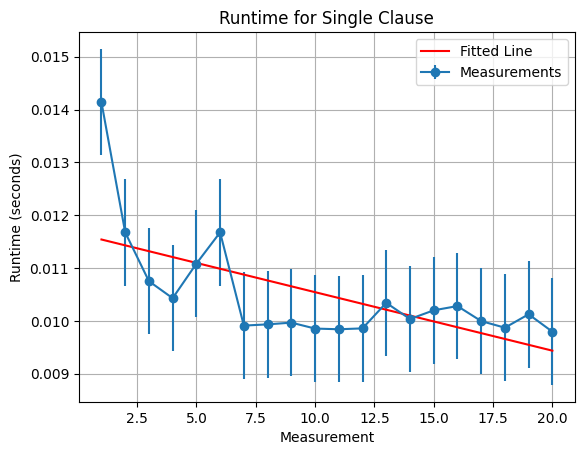

Fitted Line: y = -0.0001x + 0.0117
Mean Runtime: 0.0105 seconds
Standard Deviation: 0.0010 seconds
Confidence Interval (90.0%): [0.0102, 0.0108]
Running Time Expression: Running Time = -0.0001 * x + 0.0117


In [141]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import t

clause = [("x3", "x2"), ("x1", "!x4"), ("x6", "x5"), ("x5", "x1"), ("x2", "!x3"), ("x4", "!x2"), ("!x6", "x2"), ("x3", "!x6"), ("!x3", "x4"), ("x6", "!x5")]

num_iterations = 1000

num_measurements = 20

confidence_level = 0.9

measurement_times = []

for _ in range(num_measurements):
    start_time = time.time()
    num_variables = num_vars(clause)
    best_assignments, best_satisfaction = random_max2sat(clause, num_variables, num_iterations)
    end_time = time.time()
    measurement_times.append(end_time - start_time)

mean_runtime = np.mean(measurement_times)
std_runtime = np.std(measurement_times)

degrees_of_freedom = num_measurements - 1

t_value = t.ppf(confidence_level, degrees_of_freedom)

std_error = std_runtime / np.sqrt(num_measurements)

margin_of_error = t_value * std_error

confidence_interval = (mean_runtime - margin_of_error, mean_runtime + margin_of_error)

x = range(1, num_measurements + 1)
fit_func = lambda x, a, b: a * x + b
fit_params, _ = curve_fit(fit_func, x, measurement_times)

fitted_line = fit_func(x, *fit_params)

plt.errorbar(x, measurement_times, yerr=std_runtime, marker='o', label='Measurements')
plt.plot(x, fitted_line, color='red', label='Fitted Line')
plt.xlabel('Measurement')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime for Single Clause')
plt.grid(True)
plt.legend()
plt.show()

a, b = fit_params
print(f"Fitted Line: y = {a:.4f}x + {b:.4f}")

print(f"Mean Runtime: {mean_runtime:.4f} seconds")
print(f"Standard Deviation: {std_runtime:.4f} seconds")
print(f"Confidence Interval ({confidence_level*100}%): [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

running_time_expression = f"Running Time = {a:.4f} * x + {b:.4f}"
print("Running Time Expression:", running_time_expression)


Test Bench to Observe the Impact of the Num. Clauses on Correctness

In [138]:
#size 7
#num_vars = 4
#num_clauses = 2 4 8 16 32 64 128
clauses_lists = [
  [("!x1", "x2"), ("x1", "!x4")],
  [("x4", "x2"), ("!x3", "x2"), ("x2", "!x4"), ("!x3", "x2")],
  [("!x2", "x4"), ("!x1", "!x3"), ("x4", "!x2"), ("!x4", "x2"), ("!x2", "!x1"), ("!x1", "!x2"), ("!x1", "!x2"), ("!x3", "!x1")],  
  [("x3", "!x2"), ("x3", "x2"), ("!x2", "!x4"), ("x4", "x2"), ("x2", "x3"), ("x3", "x4"), ("x1", "!x2"), ("!x3", "!x1"), ("!x2", "!x4"), ("!x1", "x3"), ("!x3", "x2"), ("x2", "!x1"), ("!x3", "!x2"), ("!x3", "x2"), ("!x2", "x4"), ("x2", "!x1")],
  [("!x4", "!x1"), ("x4", "x2"), ("x3", "x4"), ("!x1", "!x2"), ("!x3", "!x1"), ("x3", "!x2"), ("x3", "x1"), ("x1", "x3"), ("x2", "!x4"), ("!x3", "!x2"), ("x3", "!x1"), ("!x4", "x3"), ("!x3", "x1"), ("x4", "!x2"), ("!x4", "x2"), ("x4", "x3"), ("!x2", "!x1"), ("!x3", "x1"), ("!x3", "x2"), ("!x4", "x2"), ("x3", "!x1"), ("!x2", "!x3"), ("x1", "!x3"), ("x4", "x1"), ("x3", "x4"), ("x3", "!x1"), ("x1", "x2"), ("!x2", "x4"), ("!x2", "x1"), ("x3", "x1"), ("x4", "!x1"), ("x3", "x2")],
  [("!x2", "!x3"), ("!x1", "x3"), ("x2", "x3"), ("!x3", "!x2"), ("!x3", "x4"), ("x1", "!x4"), ("!x4", "!x2"), ("!x1", "!x3"), ("x2", "x4"), ("!x4", "!x2"), ("!x2", "!x3"), ("x4", "!x1"), ("!x2", "x1"), ("!x2", "!x4"), ("x4", "!x3"), ("!x2", "x3"), ("!x1", "!x4"), ("x2", "!x4"), ("!x3", "!x1"), ("!x1", "x4"), ("!x2", "x1"), ("!x4", "!x1"), ("x3", "x4"), ("x4", "!x2"), ("!x2", "x3"), ("!x3", "x1"), ("x2", "x3"), ("x1", "!x4"), ("!x1", "x2"), ("!x4", "!x1"), ("!x4", "x3"), ("x1", "x4"), ("!x3", "!x2"), ("x2", "x3"), ("x3", "!x2"), ("!x1", "x2"), ("!x3", "x1"), ("x4", "x1"), ("x1", "!x4"), ("x2", "!x3"), ("x2", "!x1"), ("x3", "x4"), ("!x1", "x3"), ("x3", "!x1"), ("!x4", "!x3"), ("x4", "!x2"), ("x2", "x1"), ("x1", "x4"), ("!x3", "!x1"), ("x2", "!x4"), ("!x3", "x4"), ("x2", "x4"), ("!x4", "x3"), ("!x4", "!x2"), ("!x4", "x1"), ("!x4", "x1"), ("x1", "!x3"), ("x1", "!x4"), ("!x3", "!x2"), ("x1", "x2"), ("!x1", "x2"), ("x2", "!x4"), ("!x1", "x4"), ("x2", "x1")],
  [("!x4", "!x1"), ("!x1", "x2"), ("x1", "!x4"), ("x4", "!x3"), ("!x4", "!x1"), ("x3", "!x1"), ("x1", "x3"), ("!x4", "x1"), ("!x1", "x2"), ("x3", "!x1"), ("!x1", "x4"), ("x2", "!x3"), ("!x4", "!x3"), ("x4", "!x3"), ("x2", "!x4"), ("!x3", "!x1"), ("!x2", "x1"), ("x4", "x1"), ("x2", "x1"), ("!x3", "x2"), ("x4", "!x1"), ("x4", "x3"), ("x2", "!x1"), ("x1", "!x2"), ("x1", "!x4"), ("x1", "x3"), ("!x3", "!x4"), ("!x3", "!x4"), ("!x3", "x4"), ("x1", "x2"), ("!x3", "x1"), ("x2", "x1"), ("!x2", "x3"), ("!x4", "x1"), ("x1", "!x4"), ("!x1", "x4"), ("!x4", "!x3"), ("x4", "x1"), ("x2", "x1"), ("x4", "!x3"), ("x3", "x4"), ("!x2", "!x3"), ("x4", "!x2"), ("!x1", "!x3"), ("x2", "!x4"), ("x1", "!x3"), ("!x3", "!x1"), ("x1", "!x2"), ("!x4", "!x3"), ("x2", "!x1"), ("x2", "!x3"), ("x1", "x2"), ("!x4", "x1"), ("!x2", "!x4"), ("x2", "!x3"), ("!x2", "!x3"), ("x2", "x3"), ("x2", "x4"), ("!x3", "!x4"), ("!x1", "!x3"), ("x1", "x4"), ("!x4", "!x3"), ("!x3", "!x2"), ("x1", "!x2"), ("!x2", "!x3"), ("!x1", "x2"), ("!x1", "!x2"), ("!x3", "x4"), ("x1", "x2"), ("x2", "x1"), ("!x3", "x4"), ("x2", "x1"), ("x4", "!x2"), ("!x2", "!x1"), ("!x4", "x2"), ("x2", "x4"), ("x3", "!x4"), ("!x1", "!x2"), ("x1", "!x4"), ("!x2", "!x3"), ("x4", "!x3"), ("!x3", "!x1"), ("!x3", "!x4"), ("!x3", "!x4"), ("!x1", "!x2"), ("!x1", "!x4"), ("!x1", "!x3"), ("!x3", "!x1"), ("x4", "x2"), ("x3", "x2"), ("!x1", "x2"), ("x1", "x3"), ("!x3", "!x1"), ("!x1", "x3"), ("x1", "x3"), ("!x2", "x3"), ("!x1", "!x3"), ("!x1", "!x4"), ("!x2", "x4"), ("!x2", "x1"), ("!x1", "x4"), ("x3", "x4"), ("!x1", "x3"), ("x2", "!x4"), ("x4", "x1"), ("x4", "x2"), ("x2", "!x4"), ("x2", "x3"), ("!x2", "x3"), ("!x2", "!x3"), ("!x3", "x4"), ("x1", "!x3"), ("x4", "x3"), ("x1", "!x4"), ("!x1", "x4"), ("x4", "!x1"), ("!x1", "!x2"), ("x1", "x4"), ("!x3", "!x2"), ("!x2", "!x3"), ("!x3", "x2"), ("!x2", "!x3"), ("!x4", "!x2"), ("x3", "!x1"), ("x4", "x2"), ("!x3", "!x4"), ("x3", "!x2"), ("x3", "x1")]
]

num_iterations = 1000

for clause in clauses_lists:
  print("----------")
  num_variables = num_vars(clause)
  print("Clauses: ", end="") 
  print(clause)
  best_assignments, best_satisfaction = random_max2sat(clause, num_variables, num_iterations)
  print("Variables: ", end="")
  for i in range(1, num_variables + 1):
      print("x" + str(i) + " ", end="")
  print("")
  print("Best Assignments:")
  for assignment in best_assignments:
      assignment_str = " ".join(str(value) for value in assignment)
      print(assignment_str)
  print("Best Satisfaction:", best_satisfaction)

----------
Clauses: [('!x1', 'x2'), ('x1', '!x4')]
Variables: x1 x2 x3 x4 
Best Assignments:
0 0 1 0
1 1 0 0
0 1 0 0
1 1 1 0
0 1 1 0
0 0 0 0
1 1 0 1
1 1 1 1
Best Satisfaction: 2
----------
Clauses: [('x4', 'x2'), ('!x3', 'x2'), ('x2', '!x4'), ('!x3', 'x2')]
Variables: x1 x2 x3 x4 
Best Assignments:
0 1 0 1
0 1 1 1
1 1 0 0
0 1 0 0
1 1 1 0
0 1 1 0
1 1 0 1
1 1 1 1
Best Satisfaction: 4
----------
Clauses: [('!x2', 'x4'), ('!x1', '!x3'), ('x4', '!x2'), ('!x4', 'x2'), ('!x2', '!x1'), ('!x1', '!x2'), ('!x1', '!x2'), ('!x3', '!x1')]
Variables: x1 x2 x3 x4 
Best Assignments:
0 0 1 0
0 1 0 1
0 1 1 1
0 0 0 0
1 0 0 0
Best Satisfaction: 8
----------
Clauses: [('x3', '!x2'), ('x3', 'x2'), ('!x2', '!x4'), ('x4', 'x2'), ('x2', 'x3'), ('x3', 'x4'), ('x1', '!x2'), ('!x3', '!x1'), ('!x2', '!x4'), ('!x1', 'x3'), ('!x3', 'x2'), ('x2', '!x1'), ('!x3', '!x2'), ('!x3', 'x2'), ('!x2', 'x4'), ('x2', '!x1')]
Variables: x1 x2 x3 x4 
Best Assignments:
0 0 0 1
0 0 1 1
Best Satisfaction: 14
----------
Clauses: [('!x

Test Bench to Observe the Impact of the Num. Variables on Correctness

In [139]:
#size 5
#num_vars = 6 8 10 12 16
#num_clauses = 8
clauses_lists = [
  [("!x6", "!x1"), ("x6", "!x1"), ("!x4", "x5"), ("!x6", "x1"), ("x2", "!x3"), ("!x5", "!x2"), ("!x5", "x6"), ("x4", "x5")],
  [("x2", "x7"), ("!x6", "x7"), ("x6", "x1"), ("x1", "!x5"), ("!x7", "!x1"), ("!x6", "!x7"), ("!x4", "x5"), ("x6", "x4")],
  [("!x4", "x7"), ("x6", "!x8"), ("x8", "x9"), ("x2", "!x4"), ("x3", "!x5"), ("!x2", "x4"), ("x4", "!x1"), ("x8", "!x9")],
  [("x4", "x3"), ("!x10", "x3"), ("!x12", "x7"), ("!x12", "!x3"), ("!x11", "x2"), ("!x8", "!x2"), ("x8", "!x1"), ("x2", "!x7")],
  [("!x10", "x13"), ("!x6", "x11"), ("x10", "!x14"), ("x9", "!x14"), ("x9", "!x1"), ("!x15", "x2"), ("x4", "!x5"), ("!x13", "x1")]
]

num_iterations = 1000

for clause in clauses_lists:
  print("----------")
  num_variables = num_vars(clause)
  print("Clauses: ", end="") 
  print(clause)
  best_assignments, best_satisfaction = random_max2sat(clause, num_variables, num_iterations)
  print("Variables: ", end="")
  for i in range(1, num_variables + 1):
      print("x" + str(i) + " ", end="")
  print("")
  print("Best Assignments:")
  for assignment in best_assignments:
      assignment_str = " ".join(str(value) for value in assignment)
      print(assignment_str)
  print("Best Satisfaction:", best_satisfaction)


----------
Clauses: [('!x6', '!x1'), ('x6', '!x1'), ('!x4', 'x5'), ('!x6', 'x1'), ('x2', '!x3'), ('!x5', '!x2'), ('!x5', 'x6'), ('x4', 'x5')]
Variables: x1 x2 x3 x4 x5 x6 
Best Assignments:
0 0 0 0 1 1
0 1 0 0 0 0
0 0 0 0 0 0
0 0 0 0 1 0
0 1 0 1 0 0
0 0 0 1 0 0
0 0 0 1 1 1
1 0 0 0 1 1
1 0 0 1 1 1
0 1 1 0 0 0
0 0 0 1 1 0
0 1 1 1 0 0
Best Satisfaction: 7
----------
Clauses: [('x2', 'x7'), ('!x6', 'x7'), ('x6', 'x1'), ('x1', '!x5'), ('!x7', '!x1'), ('!x6', '!x7'), ('!x4', 'x5'), ('x6', 'x4')]
Variables: x1 x2 x3 x4 x5 x6 x7 
Best Assignments:
1 1 0 1 1 0 0
1 1 1 1 1 0 0
Best Satisfaction: 8
----------
Clauses: [('!x4', 'x7'), ('x6', '!x8'), ('x8', 'x9'), ('x2', '!x4'), ('x3', '!x5'), ('!x2', 'x4'), ('x4', '!x1'), ('x8', '!x9')]
Variables: x1 x2 x3 x4 x5 x6 x7 x8 x9 
Best Assignments:
0 1 0 1 0 1 1 1 1
0 0 1 0 0 1 0 1 0
0 0 1 0 1 1 0 1 0
1 1 0 1 0 1 1 1 1
0 1 1 1 1 1 1 1 0
0 0 1 0 0 1 1 1 1
0 0 0 0 0 1 0 1 0
1 1 0 1 0 1 1 1 0
1 1 1 1 0 1 1 1 0
0 1 0 1 0 1 1 1 0
0 1 1 1 0 1 1 1 1
0 0 0 0 0 

Test Bench to Measure the Time

In [140]:
clause = [("x3", "x2"), ("x1", "!x4"), ("x6", "x5"), ("x5", "x1"), ("x2", "!x3"), ("x4", "!x2"), ("!x6", "x2"), ("x3", "!x6"), ("!x3", "x4"), ("x6", "!x5")]

num_iterations = 1000

start_time = time.time()
num_variables = num_vars(clause)
best_assignments, best_satisfaction = random_max2sat(clause, num_variables, num_iterations)
print("Best Satisfaction:", best_satisfaction)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

Best Satisfaction: 10
0.012920141220092773
